#### PER-2020 - SIN-392 - Introdução ao Processamento Digital de Imagens 

# Aula 05b - Segmentação de imagens

## Prof. João Fernando Mari
-----

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage as ndi

from skimage import util, filters, data, morphology, measure, color

# import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

## Carregando uma imagem

In [2]:
# Carrega a imagem.
img = data.coins()

# Converte para float [0-1]
img = util.img_as_float(img.astype(np.uint8))

## Efeito da variação do valor do limiar

In [3]:
# Lista com os valorer de limiar
limiares = [0.1, 0.2, 0.5, 0.7, 0.9]

# Lista que receberá as imagens processadas
img_list = []

# Insere a imagem original no início da lista
img_list.append(img)

# Processa a imagem original com os valores na lista 'limiares'
for limiar in limiares:
    # Realiza a limiarização (thresholding)
    # - Valores maiores do que o limiar --> True
    # - Valores menores ou iguais ao limiar --> False
    im_temp = img > limiar
    
    # Insere a imagem processada na lista 'img_list'
    img_list.append(im_temp)

### Plota as imagens 

<IPython.core.display.Javascript object>


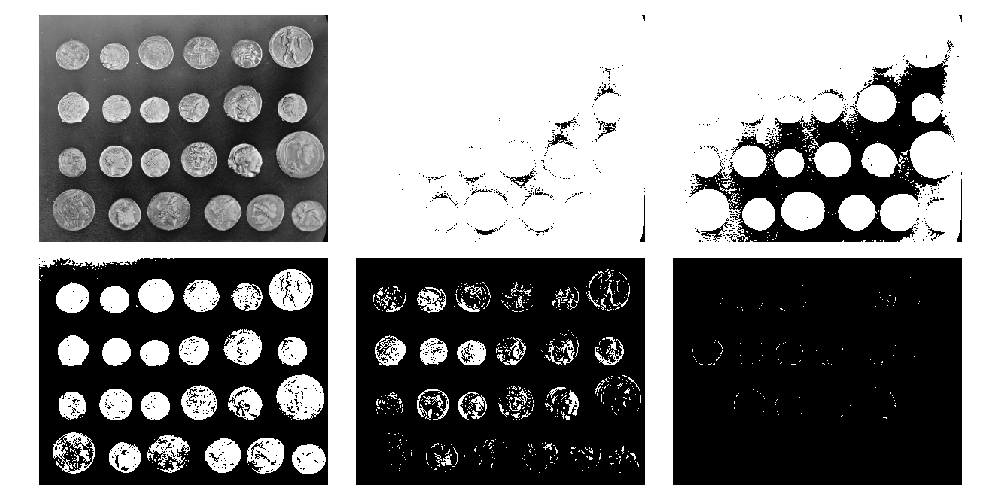

In [4]:
# Cria uma figura
plt.figure(figsize=(10,5))

for i, img_ in enumerate(img_list):
    plt.subplot(2,3,i+1)
    plt.imshow(img_, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    
# Mostra as figuras na tela
plt.show()

## Limiarização global simples

Implementação de um método iterativo simples para encontrar um valor de limiar para segmentar uma imagem.


Iteracao:  0
 - T anterior:  0.1
 - T atual:     0.23526893853148698
 - delta_T      0.13526893853148697


<IPython.core.display.Javascript object>


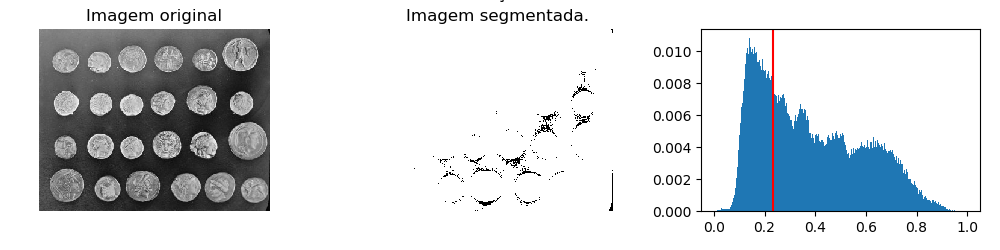


Iteracao:  1
 - T anterior:  0.23526893853148698
 - T atual:     0.32323202644545423
 - delta_T      0.08796308791396726


<IPython.core.display.Javascript object>


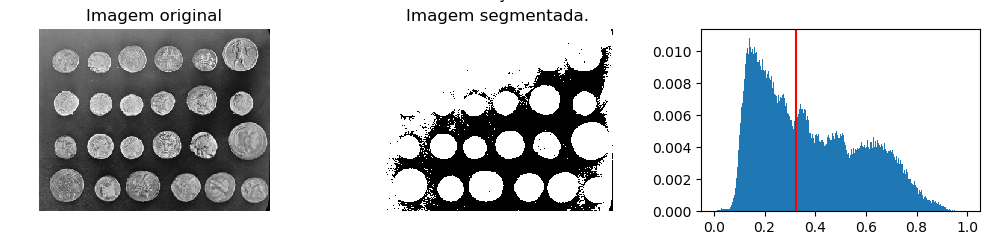


Iteracao:  2
 - T anterior:  0.32323202644545423
 - T atual:     0.3716258334458229
 - delta_T      0.04839380700036866


<IPython.core.display.Javascript object>


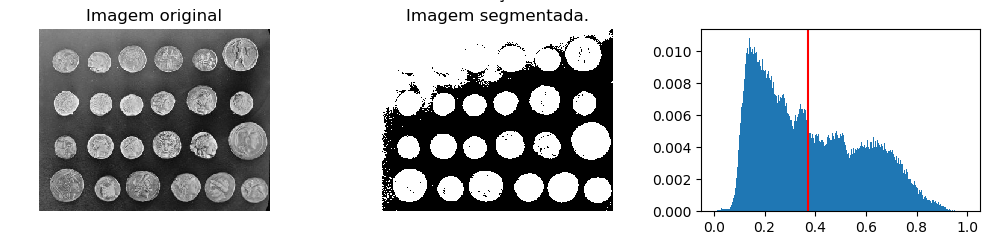


Iteracao:  3
 - T anterior:  0.3716258334458229
 - T atual:     0.3979501045502393
 - delta_T      0.02632427110441643


<IPython.core.display.Javascript object>


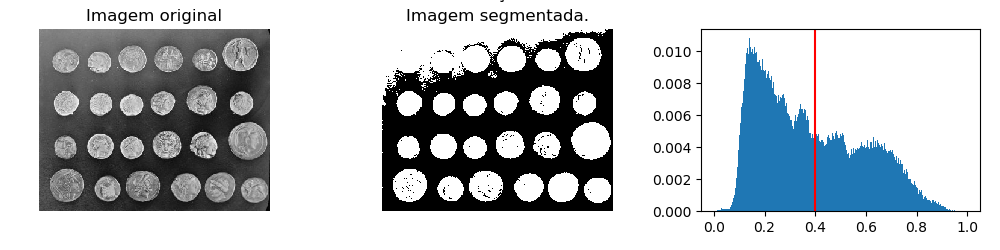


Iteracao:  4
 - T anterior:  0.3979501045502393
 - T atual:     0.4106239381482553
 - delta_T      0.012673833598015993


<IPython.core.display.Javascript object>


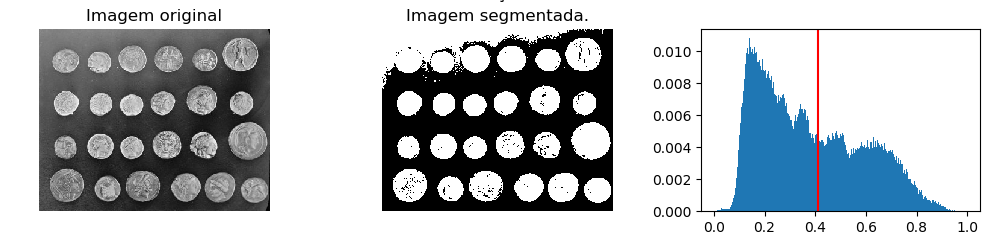


Iteracao:  5
 - T anterior:  0.4106239381482553
 - T atual:     0.4161211953105037
 - delta_T      0.005497257162248359


<IPython.core.display.Javascript object>


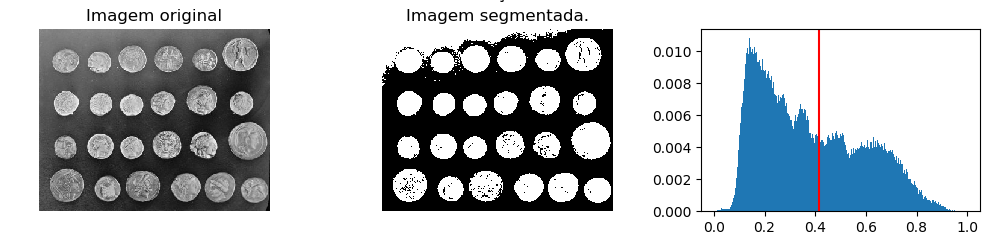


T final:  0.4161211953105037


<IPython.core.display.Javascript object>


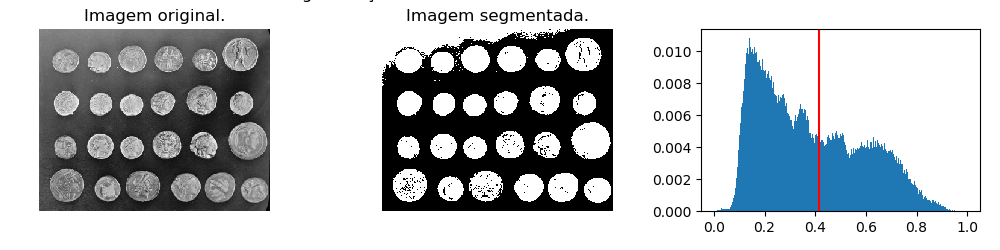

In [5]:
# Importa as bibliotecas necessárias
import numpy as np
from scipy import misc
from skimage import img_as_float, data
import matplotlib.pyplot as plt

def limiar_global_simples(im, T_ini=None, min_delta_T=None, plot=False):
    """
    Algoritmo de limiarização iterativa simples.
    
    Parameters:
    -----------
    T_ini: float
        Default: None.
    
    min_delta_T: float
        Defult: None.
    
    plot: bool
        Deafult: False.
    """
    if T_ini==None:
        # Nenhum valor inicial atribuido. Considerar a intensidade média.
        T_ini = im.mean()
        
    if min_delta_T==None:
        # Se min_delta_T nao informado:
        # - 'min_delta_T' eh 1% da maior intensidade!
        min_delta_T = im.max() * 0.01

    # Inicializa T com T_ini.
    T = T_ini
    # Inicializa delta_T com Infinito. 
    delta_T = np.inf

    # Iterar enquanto delta_t >= min_delta_T
    i = 0
    while delta_T >= min_delta_T:
        # Segmenta a imagem usando T.
        g_bw = im > T

        # Calcula o numero de pixels de objeto e de fundo.
        num_px_bg, num_px_fg = np.bincount(g_bw.flatten()) 

        # Constroi imagem com os pixels de objeto.
        g_fg = im * g_bw
        # Constroi imagem com os pixels de fundo.
        g_bg = im * np.invert(g_bw)

        # Intensidade média - pixels de objeto
        fg_mean = g_fg.sum() / float( num_px_fg )
        # Intensidade média – pixels de fundo
        bg_mean = g_bg.sum() / float( num_px_bg )

        # Armazena valor atual de T.
        T_old = T
        
        # Calcula um novo limiar T.        
        T = 0.5 * (fg_mean + bg_mean)
        
        # Calcula o novo valor de delta_T.
        delta_T = np.abs(T - T_old)

        # Mostra informacoes na tela
        print('\nIteracao: ', i)
        print(' - T anterior: ', T_old)
        print(' - T atual:    ', T)
        print(' - delta_T     ', delta_T)

        # Plota as imagens parciais
        if plot == True:
            plt.figure(figsize=(10,2.5))
            plt.suptitle(str('Iteração ' + str(i)) , y=1.05)

            plt.subplot(131); 
            plt.imshow(im, cmap='gray')
            plt.axis('off')
            plt.title('Imagem original')

            plt.subplot(132); 
            plt.imshow(g_bw, cmap='gray')
            plt.axis('off')
            plt.title('Imagem segmentada.')

            plt.subplot(133); 
            # Plota histograma
            ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
            weights = np.ones(im.ravel().shape)/float(im.size)
            plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
            plt.axvline(T, color='r')

            plt.tight_layout()
            # plt.show()

        # Incrementa i
        i = i + 1

    # Retorna o limiar T.
    return T

if __name__ == '__main__':
    """
    """
    # Carrega a imagem
    # ----------------
    ## im = misc.ascent()
    ## im = data.camera()
    im = data.coins()

    im = img_as_float(im.astype(np.uint8))

    # Chama a funcao para calculo do limiar global iterativo
    # ------------------------------------------------------
    valor_T = limiar_global_simples(im=im, T_ini=0.1, plot=True)
    # TESTE
    print('\nT final: ', valor_T)

    # Segmenta a imagem com o limiar T.
    im_bw = im > valor_T

    # Mostra a imagem final
    # ---------------------
    plt.figure(figsize=(10,2.5))
    plt.suptitle('Segmentação Final - Limiar = ' + str(valor_T), y=1.05)
    plt.subplot(131)
    plt.imshow(im, cmap='gray')
    plt.title('Imagem original.')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(im_bw, cmap='gray')
    plt.title('Imagem segmentada.')
    plt.axis('off')
    plt.subplot(133); 
    # Plota histograma
    weights = np.ones(im.ravel().shape)/float(im.size)
    plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
    plt.axvline(valor_T, color='r')

    # Mostra as figuras na tela
    # -------------------------
    plt.tight_layout()
    plt.show()

## O método de Otsu

O método de Otsu calcula o limiar ótimo para segmentar uma imagem maximizando a variância entre as classes.

In [6]:
th_otsu = filters.threshold_otsu(img)

print(th_otsu)

# Aplicando a limiarização
img_otsu = img > th_otsu

0.4172564338235294


<IPython.core.display.Javascript object>


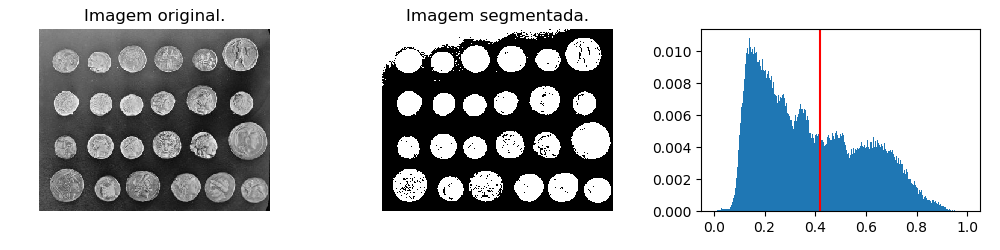

In [7]:
plt.figure(figsize=(10,2.5))
plt.suptitle('Otsu - Limiar = ' + ('%.4f' % (th_otsu)), y=1.05)
plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.title('Imagem original.')
plt.axis('off')
plt.subplot(132)
plt.imshow(img_otsu, cmap='gray')
plt.title('Imagem segmentada.')
plt.axis('off')
plt.subplot(133); 
# Plota histograma
weights = np.ones(im.ravel().shape)/float(im.size)
plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
plt.axvline(th_otsu, color='r')

# Mostra as figuras na tela
# -------------------------
plt.tight_layout()
plt.show()

## Efeito da suavização na limiarização

In [8]:
# Impõe ruído Gaussiano na imagem
img_noise = util.random_noise(img)

<IPython.core.display.Javascript object>


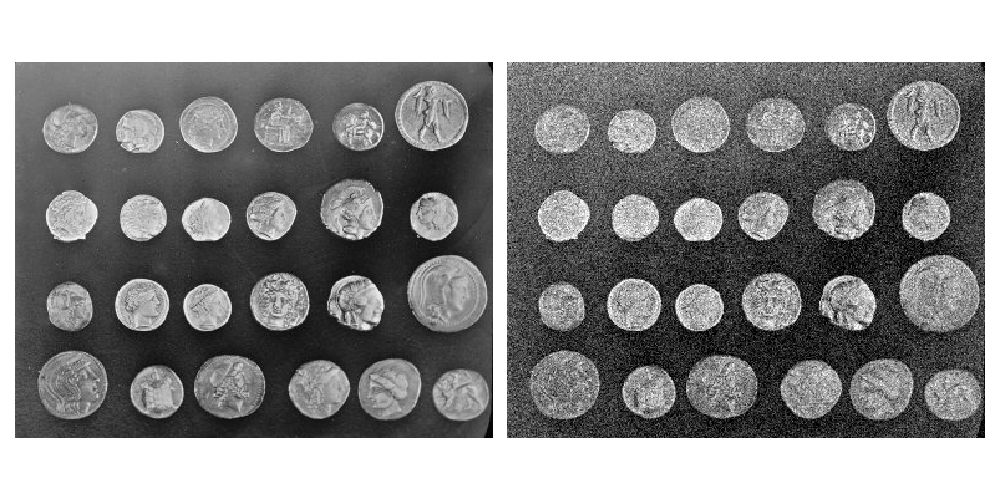

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_noise, cmap='gray')

plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
medias = [3, 5, 7, 9]

# Lista com as imagens filtradas pela média.
imagens_med = []
# Lista com as imagens segmentadas pelo método de Otsu.
imagens_seg = []
# Lista com os valores de limiares.
limiares = []

for media in medias:
    # Realiza a filtragem pela média
    im_med = ndi.convolve(img_noise, np.ones([media, media])/(media * media))
    imagens_med.append(im_med)
    
    # Calcula o limiar para cada imagem após a filtragem.
    limiar = filters.threshold_otsu(im_med)
    limiares.append(limiar)
    
    # Realiza a limiarização.
    im_temp = im_med > limiar
    imagens_seg.append(im_temp)
    
# Imprime os limiares
print(limiares)

[0.41045865107229595, 0.4048844365065844, 0.40343971617835794, 0.3997080609496651]


### Plota as imagens

<IPython.core.display.Javascript object>


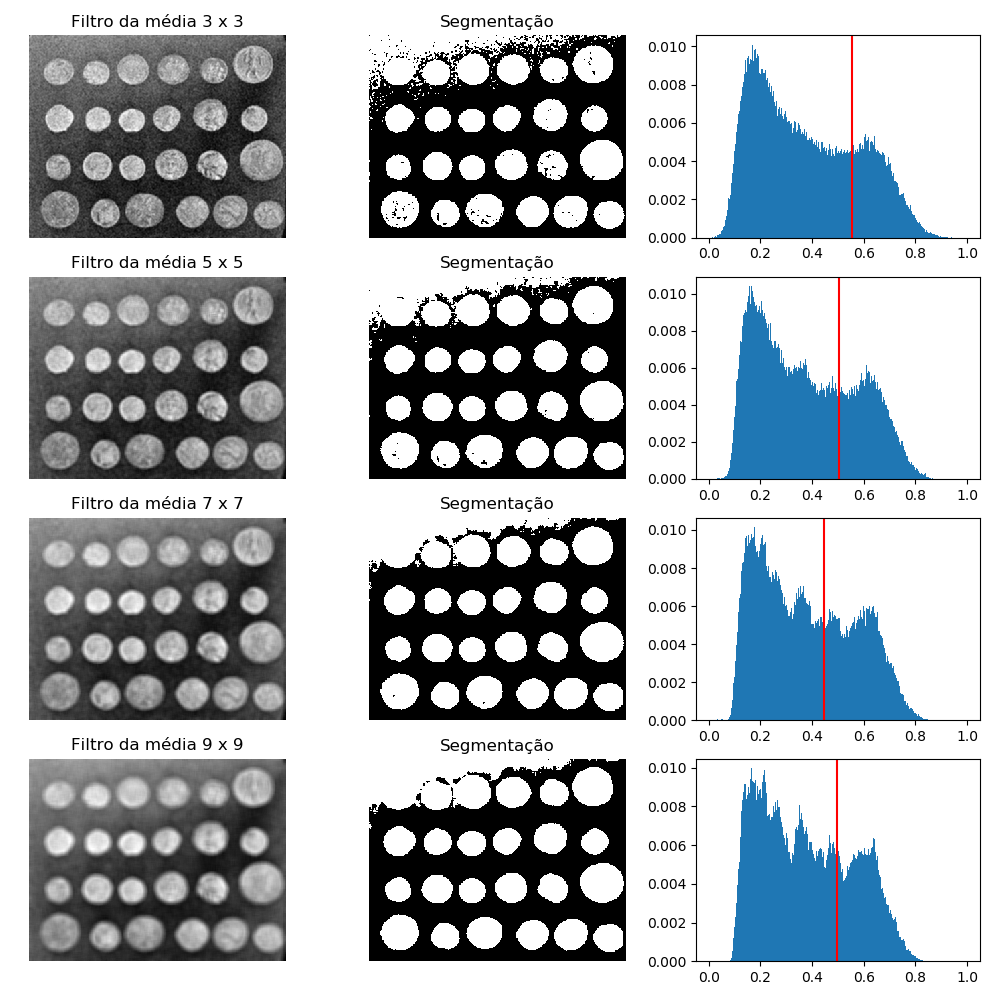

In [19]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
for i in range(len(imagens_seg)):
    # Plota imagem
    im_ = ax[i, 0].imshow(imagens_med[i], cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(str('Filtro da média ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plota imagem
    im_ = ax[i, 1].imshow(imagens_seg[i], cmap='gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(str('Segmentação'))

    # Plota histograma
    weights = np.ones(imagens_med[i].ravel().shape)/float(im.size)
    ax[i, 2].hist(imagens_med[i].ravel(), bins=256, weights=weights, range=(0,1))
    
    ax[i, 2].axvline(limiares[i], color='r')
    
plt.tight_layout()
plt.show()

## Limialização local

<p>Consiste em dividir uma imagens em sub-imagens usando fatiamento.</p>
<p>Cada sub-imagem é segmentada individualmente usando o método de Otsu.</p>
<p>As sub-imagens segmentadas são então combinadas em uma imagem única.</p>

In [12]:
# Observação:
# -----------
# - Esta é uma implementação simplificada para fins didáticos.
# Caso a divisão das linhas ou colunas não seja exata, ou seja,
#     restem algumas linhas ou colunas, esses linhas e colunas são ignoradas.
# Exemplo:
# --------
# Imagem com 512 x 512 dividida em 3 linhas e 3 colunas
# - Altura das sub-imagens: 512 // 3 = 170 pixels. Restam 2 pixels (170 * 3 = 500)

# **** Digite o número de sub-imagens  ****
# Mesmo valor em x e em y.
num_tiles = 3

# Número de linhas e de colunas na imagem
num_l, num_c = im.shape
# print(num_l, num_c)

# Tamanho das sub-imagens
size_tile_l = int(num_l // num_tiles)
size_tile_c = int(num_c // num_tiles)
# print(size_tile_l, size_tile_c)

# Tamanho das últimas sub-imagens
size_last_l = int(num_l % num_tiles)
size_last_c = int(num_c % num_tiles)
# print(size_last_l, size_last_c)

# Recorda as sub-imagens e as armazena em uma lista de imagens
# ============================================================
lin = np.arange(0, num_l, num_l/num_tiles).astype(int)
col = np.arange(0, num_c, num_c/num_tiles).astype(int)
# print(lin)
# print(col)

# Lista com as sub-imagens
tiles = []

i = 0
for l in lin:
    for c in col:
        # Recorta a sub-imagem
        im_tile = im[l:l+size_tile_l, c:c+size_tile_c]
        
        # Adiciona a sub-imagem a lista
        tiles.append(im_tile)
        
        i = i + 1
        
# Segmenta cada sub-imagem individualmente usando o método de Otsu
# ================================================================

# Lista com os limiares para cada sub-imagem
limiares = []
# Lista com as sub-imagens segmentadas
tiles_seg = []

for tile in tiles:
    limiar = filters.threshold_otsu(tile)
    limiares.append(limiar)
    
    tile_seg = tile > limiar
    tiles_seg.append(tile_seg)
    
# Combina as imagens segmentadas em uma nova imagem única
# =======================================================
i = 0 # Contador para as sub-imagens

# Imagem de saída
im_seg = np.zeros(im.shape)

for l in lin:
    for c in col:
        im_seg[l:l+tiles_seg[i].shape[0], c:c+tiles_seg[i].shape[1]] = tiles_seg[i]
        i = i + 1

### Plota as imagens

<IPython.core.display.Javascript object>


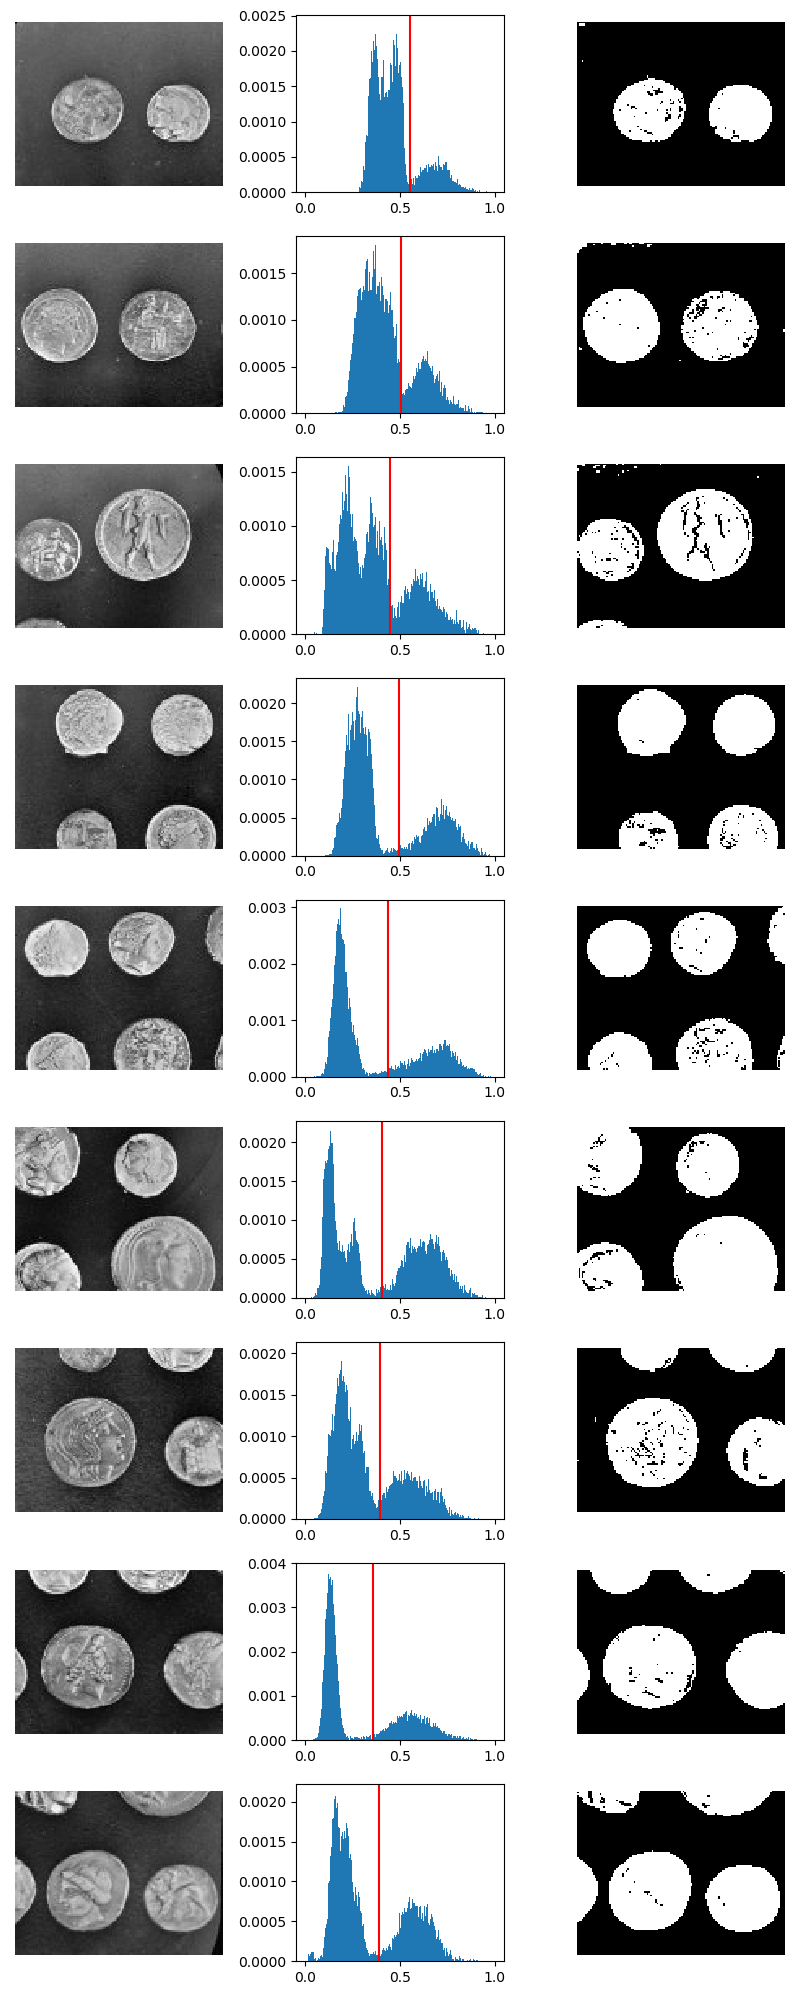

In [17]:
total_tiles = num_tiles * num_tiles

fig, ax = plt.subplots((total_tiles), 3, figsize=(8, 20))
for i in range(len(tiles)):
    # Plota imagem
    im_ = ax[i, 0].imshow(tiles[i], cmap='gray')
    ax[i, 0].axis('off')
    # ax[i, 0].set_title(str('Filtro da média ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(tiles[i].ravel().shape)/float(im.size)
    ax[i, 1].hist(tiles[i].ravel(), bins=256, weights=weights, range=(0,1))
    
    ax[i, 1].axvline(limiares[i], color='r')   
    
    im_ = ax[i, 2].imshow(tiles_seg[i], cmap='gray')
    ax[i, 2].axis('off')
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


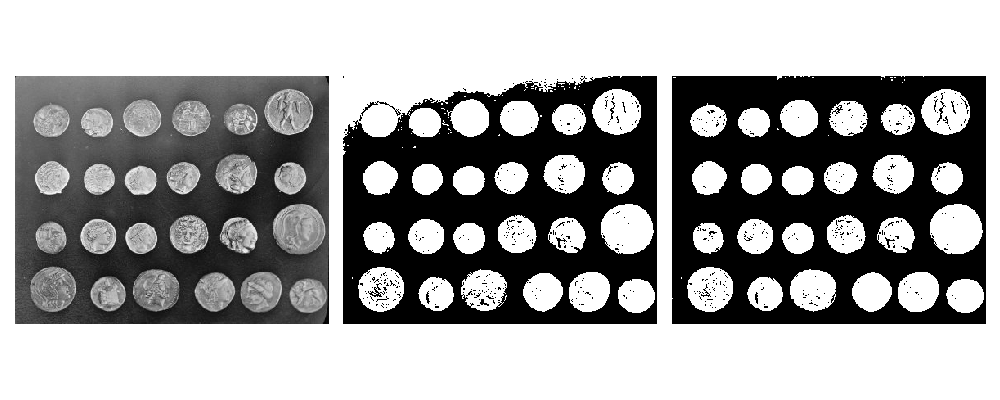

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 4))

ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax2.imshow(img_otsu, cmap='gray')
ax2.axis('off')
ax3.imshow(im_seg, cmap='gray')
ax3.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

## Rótulos (labels)

In [15]:
# Observação:
# -----------
# Isso é uma operação de morfologia matemática. Tema da próxima parte da disciplina.
# Serve para suavizar a forma dos objetos na imagem.
im_seg_cl = morphology.closing(im_seg, np.ones([3,3], dtype=float))

# Gera a imagem de rótulos
im_rotulos = measure.label(im_seg_cl)

# Gera uma representação colorida da imagem de rótulos.
#     - Cada rótulo recebe uma cor.
im_rotulos_sobre = color.label2rgb(im_rotulos, image=im)

### Plota as imagens

<IPython.core.display.Javascript object>


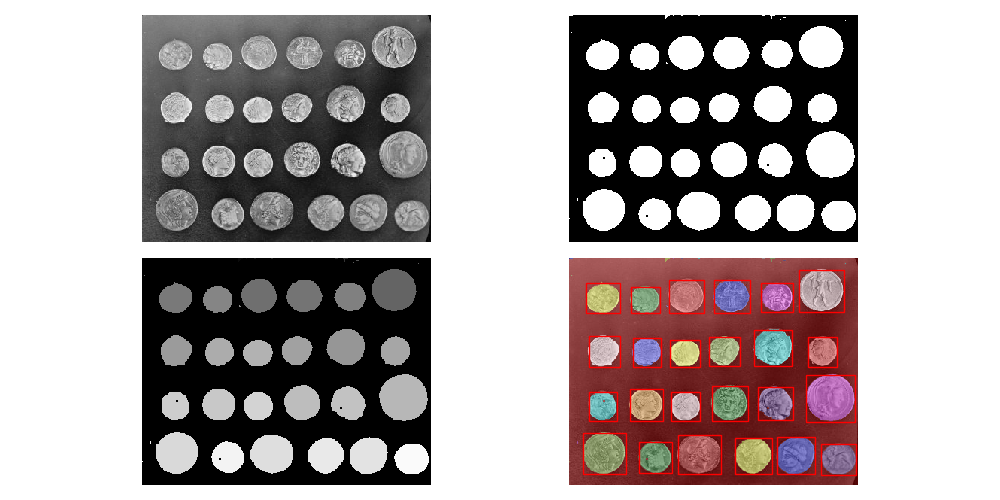

In [16]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))

ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax2.imshow(im_seg_cl, cmap='gray')
ax2.axis('off')
ax3.imshow(im_rotulos, cmap='gray')
ax3.axis('off')

ax4.imshow(im_rotulos_sobre)
for region in measure.regionprops(im_rotulos):
    # take regions with large enough areas
    if region.area >= 100:
        # Desenha o bounding-box de cada objeto
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax4.add_patch(rect)

plt.axis('off')
plt.tight_layout()
plt.show()

# Bibliografia

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
The USC-SIPI Image Database    
    
    http://sipi.usc.edu/database/database.php
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'filters'.

    https://scikit-image.org/docs/dev/api/skimage.filters.html
    
scikit-image. Doumentação. Módulo 'feature'.

    https://scikit-image.org/docs/dev/api/skimage.feature.html
    
scikit-image. Local Otsu Threshold

    https://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_local_otsu.html
        
scikit-image. Thresholding¶

    https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
        
scikit-image. Label image regions

    https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html
    
NumPy. Documentação.

       https://numpy.org/doc/stable/
        
NumPy. Convolução
        
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html